# Assignment 3 - Build CNN Model for Classification Of Flowers

## Team member- Prakashraj N (Roll No: 310619104092)

In [1]:
import splitfolders
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## 2. Image Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
input_folder = '.\Flowers-Dataset\\flowers'

In [5]:
splitfolders.ratio(input_folder,output="flowers",ratio=(.8,0,.2),group_prefix=None)


Copying files: 4317 files [00:03, 1292.11 files/s]


In [6]:
x_train=train_datagen.flow_from_directory(r".\flowers\train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 3452 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r".\flowers\test",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 865 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## 3. Create Model

In [9]:
model=Sequential()

## 4. Add Layers

### 4.1. Convolution Layer

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

### 4.2. MaxPooling Layer

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 4.3. Flatten Layer

In [12]:
model.add(Flatten())

### 4.4. Dense Layer

In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
Total params: 9,271,946
Trainable params: 9,271,946
Non-trainable params: 0
______________________________________________

### 4.5. Output Layer

In [15]:
model.add(Dense(5,activation='softmax'))

In [16]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

## 5. Compile The Model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

144

## 6. Fit The Model

In [18]:
epo=20
history = model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=epo)

Epoch 1/20
144/144 [==============================] - 29s 202ms/step - loss: 1.4725 - accuracy: 0.4293 - val_loss: 1.1148 - val_accuracy: 0.5538
Epoch 2/20
144/144 [==============================] - 15s 101ms/step - loss: 1.0813 - accuracy: 0.5640 - val_loss: 1.0807 - val_accuracy: 0.5653
Epoch 3/20
144/144 [==============================] - 15s 102ms/step - loss: 0.9676 - accuracy: 0.6185 - val_loss: 1.0689 - val_accuracy: 0.5977
Epoch 4/20
144/144 [==============================] - 15s 101ms/step - loss: 0.9144 - accuracy: 0.6411 - val_loss: 0.9561 - val_accuracy: 0.6497
Epoch 5/20
144/144 [==============================] - 17s 116ms/step - loss: 0.8731 - accuracy: 0.6561 - val_loss: 0.9766 - val_accuracy: 0.6370
Epoch 6/20
144/144 [==============================] - 15s 107ms/step - loss: 0.8303 - accuracy: 0.6784 - val_loss: 1.0373 - val_accuracy: 0.6324
Epoch 7/20
144/144 [==============================] - 16s 108ms/step - loss: 0.7858 - accuracy: 0.6947 - val_loss: 1.1446 - val_ac

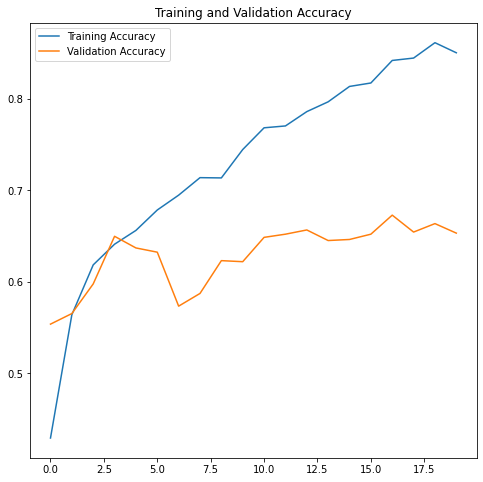

In [19]:
epochs_range = range(epo)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

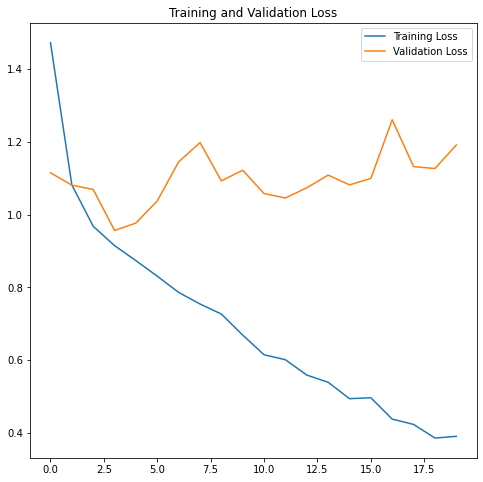

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## 7. Save the Model

In [21]:
model.save('flowers.h5')

## 8. Test the Model

In [22]:
img=image.load_img(r".\flowers\test\daisy\3706420943_66f3214862_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 0s 77ms/step


'daisy'

In [23]:
img_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
img_path = tf.keras.utils.get_file('Red_sunflower', origin=img_url)

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)
model = tf.keras.applications.resnet50.ResNet50()
prediction = model.predict(img_preprocessed)

print(decode_predictions(prediction, top=3)[0])

score = tf.nn.softmax(prediction[0])

35363/35363 [==============================] - 0s 0us/step
[('n11939491', 'daisy', 0.5775759), ('n02206856', 'bee', 0.24938338), ('n03991062', 'pot', 0.01181931)]
